# Suicide Data Analysis
### By Charles Zheng

# Introduction

Suicide is a sensitive topic to discuss, but it is important to acknowledge suicide as a serious public health problem. To better understand suicide and its possible factors, looking at historical data can be incredibly insightful. This project aims to examine key trends among a global dataset spanning 30 years. 

# Data Source

The data used from this project comes from the dataset Suicide Rates Overview 1985 to 2016 on [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), which largely consists of data collected by WHO.

# Importing and Cleaning Data

The data is stored in a csv file, which is uploaded to the Github repository. Packages and the file are imported below. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist #
import seaborn as sns

%matplotlib inline 

url = "C:\\Users\\charl\\Data_Bootcamp\\master.csv"

In [2]:
df = pd.read_csv(url)
df = df.replace(to_replace = "//N", value = np.nan) #replace all null values with NaN
df.columns = df.columns.str.capitalize() #capitalize column names
df

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k pop,Country-year,Hdi for year,gdp_for_year ($),Gdp_per_capita ($),Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Global Trends

I first want to take a look at the data on a global scale. I created a dataframe indexed by year and aggregated total suicides and population as well as finding the average suicide ratio. 

In [3]:
year_list = df["Year"].unique() #adding to list all unique years
year_list.sort() #sorting years chronologically
globaltotal_df = pd.DataFrame(year_list) #initializing dataframe for global totals
globaltotal_df.columns = ["Year"]
globaltotal_df = globaltotal_df.set_index(["Year"]) #setting year as index
globaltotal_df

""
Year
1985
1986
1987
1988
1989
1990
1991
1992
1993


In [4]:
suicide_list = [] #empty list for aggregate suicide numbers 
for year in year_list:
    temp_value = df[df["Year"] == year]["Suicides_no"].values.sum() #summing all suicides by year
    suicide_list.append(temp_value)
globaltotal_df["Total # Suicides"] = suicide_list

population_list = [] #empty list for aggregate population numbers
for year in year_list:
    temp_value = df[df["Year"] == year]["Population"].values.sum() #summing population by year
    population_list.append(temp_value)
globaltotal_df["Total Population"] = population_list
globaltotal_df["Suicide Ratio per 100k"] = (globaltotal_df["Total # Suicides"]*100000)/globaltotal_df["Total Population"] #Calculating average suicide ratio by year
globaltotal_df

,Total # Suicides,Total Population,Suicide Ratio per 100k
Year,,,
1985,116063,1008600086,11.507336
1986,120670,1029909613,11.716562
1987,126842,1095029726,11.583430
1988,121026,1054094424,11.481514
1989,160244,1225514347,13.075653
1990,193361,1466620100,13.184123
1991,198020,1489988384,13.290036
1992,211473,1569539447,13.473570
1993,221565,1530416654,14.477430


The total population can be seen trending upwards, but the number fluctuates unexpectedly at various points - for example, the drop from 1,912,057,309 in 2014 to 1,774,657,932 in 2015. The statistics for 2016 are vastly lower than previous years, so I decided to add another column tracking the number of unique countries with available data each year. 

In [5]:
uniquecountries_list = []
for year in year_list:
    temp_value = df[df["Year"] == year]["Country"].nunique()
    uniquecountries_list.append(temp_value)
globaltotal_df["Unique Countries"] = uniquecountries_list
globaltotal_df

,Total # Suicides,Total Population,Suicide Ratio per 100k,Unique Countries
Year,,,,
1985,116063,1008600086,11.507336,48
1986,120670,1029909613,11.716562,48
1987,126842,1095029726,11.583430,54
1988,121026,1054094424,11.481514,49
1989,160244,1225514347,13.075653,52
1990,193361,1466620100,13.184123,64
1991,198020,1489988384,13.290036,64
1992,211473,1569539447,13.473570,65
1993,221565,1530416654,14.477430,65


In [6]:
globaltotal_df = globaltotal_df.drop(globaltotal_df.index[31]) #dropping 2016 data
globaltotal_df

,Total # Suicides,Total Population,Suicide Ratio per 100k,Unique Countries
Year,,,,
1985,116063,1008600086,11.507336,48
1986,120670,1029909613,11.716562,48
1987,126842,1095029726,11.583430,54
1988,121026,1054094424,11.481514,49
1989,160244,1225514347,13.075653,52
1990,193361,1466620100,13.184123,64
1991,198020,1489988384,13.290036,64
1992,211473,1569539447,13.473570,65
1993,221565,1530416654,14.477430,65


It seems like the variance between the numbers each year are largely impacted by the number of countries with data available. 2016 only has data for 16 countries, so let's remove that year. 

It is important to note that the total population never reaches over 2 billion. This is largely because among the countries with missing data are China and India, which make up nearly 3 billion of the world population alone. 

Now with the dataframe filled with the data we want to look at, we can create a line plot tracking each statistic from 1985 to 2005. 

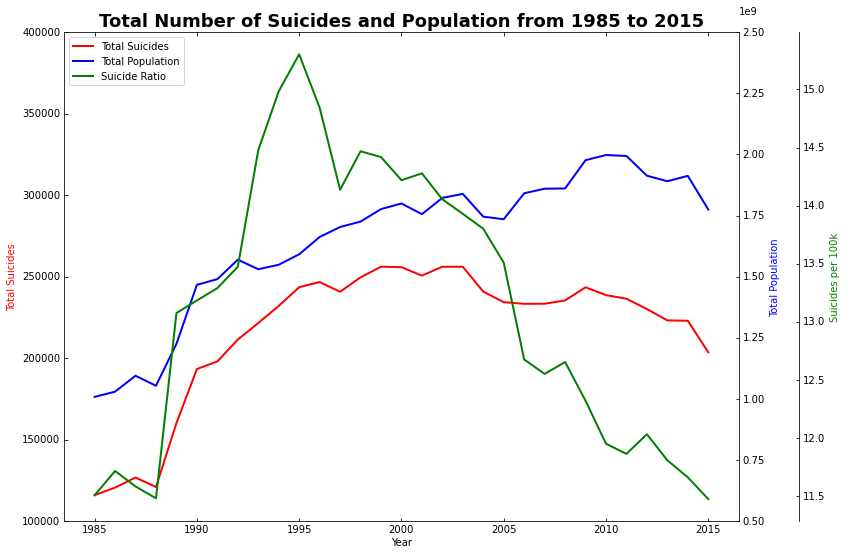

In [7]:
plt.figure(figsize=[15,9])
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right = 0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc = "right", offset = (60,0)) #shifting spine to the right to allow three lines on the plot

par1.axis["right"].toggle(all = True)
par2.axis["left"].toggle(all = True)

p1, = host.plot(globaltotal_df.index, globaltotal_df["Total # Suicides"], color = "red", label = "Total Suicides", linewidth = 2) #line tracking total suicides
p2, = par1.plot(globaltotal_df.index, globaltotal_df["Total Population"], color = "blue", label = "Total Population", linewidth = 2) #line tracking total population
p3, = par2.plot(globaltotal_df.index, globaltotal_df["Suicide Ratio per 100k"], color = "green", label = "Suicide Ratio", linewidth = 2) #line tracking suicide ratio

host.set_title("Total Number of Suicides and Population from 1985 to 2015", size = 18, fontweight = "bold")
host.set_xlabel("Year")
host.set_ylabel("Total Suicides", color = "red")
host.set_ylim(100000, 400000)

par1.set_ylabel("Total Population", color = "blue")
par1.set_ylim(500000000, 2500000000)

par2.set_ylabel("Suicides per 100k", color = "green")

host.legend(loc = "upper left")

Plotting the data over a line graph, we can see that the recorded suicides shot up between 1985 and 1995, but has trended slightly downwards since. However, since this graph tracks total suicides globally, the data is sensitive to variances of the number of countries recorded in a given year - both the population and suicide numbers may be inaccurate for assuming trends because of this. Suicides per 100k is more insightful to look at since it's a ratio. Interestingly, the average suicide rate peaked near 1995 at over 15 per 100k and is down to 11.5 in 2015. 

In [8]:
gender = {"Gender": ["Male", "Female"]} #creating dataframe for suicide statistics among gender 
gender_df = pd.DataFrame(gender)
gender_df = gender_df.set_index("Gender")

malesum = df[df["Sex"] == "male"]["Suicides_no"].values.sum() #summing global male suicides
femalesum = df[df["Sex"] == "female"]["Suicides_no"].values.sum() #summing global female suicides

gendercount = [malesum, femalesum]
gender_df["Total Suicides"] = gendercount
gender_df

,Total Suicides
Gender,
Male,5188910
Female,1559510


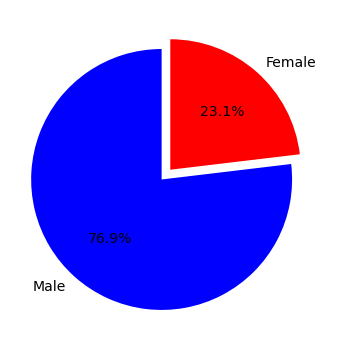

In [9]:
fig, ax = plt.subplots(figsize = (9,6))
genderlabels = ["Male", "Female"]
gendercolors = ["blue", "red"]
genderexplode = [0.1, 0]
plt.pie(gender_df["Total Suicides"], labels = genderlabels, colors = gendercolors, explode = genderexplode, startangle = 90, autopct = "%1.1f%%", textprops = {"fontsize": 14}) #creating pie chart with gender data
plt.show()

To investigate how suicide statistics compare between gender, I created a dataframe indexed by gender and plotted the data over a pie chart. Males are more likely to commit suicide than females, as they account for over 3/4ths of suicides over the time range.

<AxesSubplot:xlabel='Sex', ylabel='Suicides_no'>

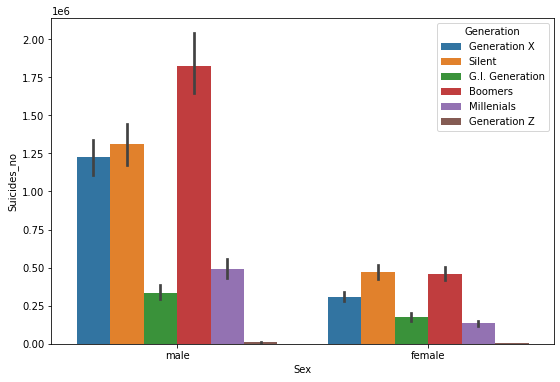

In [10]:
fig, ax = plt.subplots(figsize = (9,6))
sns.barplot(ax = ax, x = "Sex", y = "Suicides_no", hue = "Generation", data = df, estimator = sum) #creating bar chart

I also plotted the total number of suicides by both gender and generation. As confirmed by the pie chart, males have shown higher numbers of suicide across all the generations. Boomers, Generation X, and the Silent Generation account for the top three generations for suicide for both males and females. Intriguingly, while there are more female G.I. Generation suicides than female Millienials, suicide among male Millenials is higher than the male G.I. Generation. 

# Country Analysis

Shifting from looking at aggregate statistics, let's begin breaking down suicide statistics by country. Note that many have incomplete data from the date range - nonetheless, suicide rates will be important to examine. We now make a dataframe indexed by country. 

In [11]:
country_list = df["Country"].unique() #adding to list all unique countries
country_list.sort() #sorting list alphabetically
country_df = pd.DataFrame(country_list) #initializing dataframe by country
country_df.columns = ["Country"]
country_df = country_df.set_index(["Country"])

countrysuicide_list = []
for country in country_list:
    temp_value = df[df["Country"] == country]["Suicides_no"].values.sum()
    temp_value2 = df[df["Country"] == country]["Population"].values.sum()
    countrysuicide_list.append(temp_value*100000/temp_value2)
country_df["Suicides per 100k"] = countrysuicide_list
country_df

,Suicides per 100k
Country,
Albania,3.160827
Antigua and Barbuda,0.552700
Argentina,7.936309
Armenia,2.462889
Aruba,8.017928
...,...
United Arab Emirates,1.704003
United Kingdom,7.867928
United States,12.838459


Text(0, 0.5, 'Country')

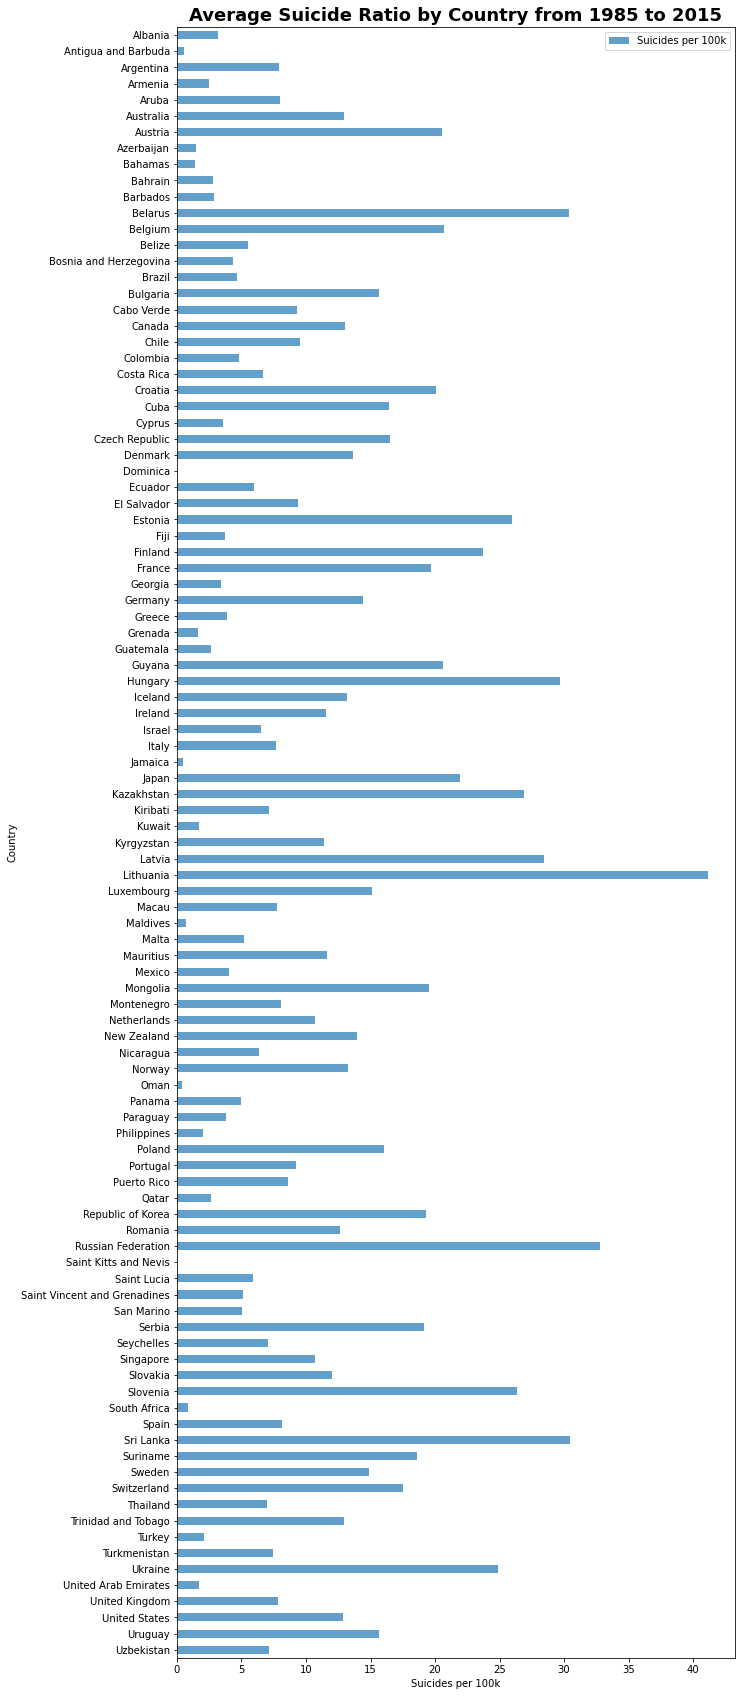

In [12]:
fig, ax = plt.subplots(figsize = (10,30))
ax.set_title("Average Suicide Ratio by Country from 1985 to 2015", size = 18, fontweight = "bold")
country_df = country_df.sort_index(ascending = False)
country_df.plot(ax = ax, kind = "barh", alpha = 0.7) #plotting suicide ratios by country
ax.set_xlabel("Suicides per 100k")
ax.set_ylabel("Country")

We can see that suicide rates vary tremendously between countries. This graph is too cluttered, so let's sort the countries by ratio and look at the extremes. 

In [13]:
country_df = country_df.sort_values(by = ["Suicides per 100k"], ascending = False) #sorting dataframe by suicide rate
country_df

,Suicides per 100k
Country,
Lithuania,41.182219
Russian Federation,32.777207
Sri Lanka,30.483939
Belarus,30.344685
Hungary,29.717558
...,...
Antigua and Barbuda,0.552700
Jamaica,0.466037
Oman,0.367194


(0.0, 45.0)

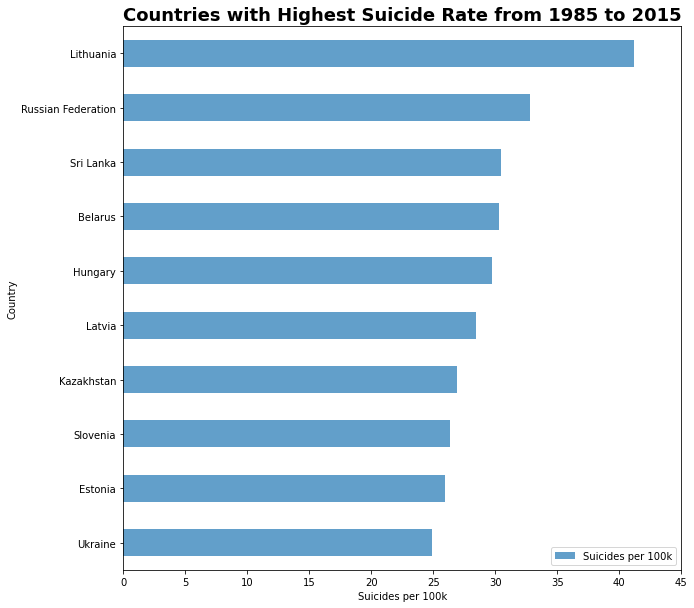

In [14]:
topcountry_df = country_df.head(10) #dataframe with 10 countries with highest suicide rate 

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Countries with Highest Suicide Rate from 1985 to 2015", size = 18, fontweight = "bold") #plotting bar graph
topcountry_df = topcountry_df.sort_values(by = ["Suicides per 100k"], ascending = True)
topcountry_df.plot(ax = ax, kind = "barh", alpha = 0.7)
ax.set_xlabel("Suicides per 100k")
ax.set_ylabel("Country")
ax.set_xlim(0,45)

(0.0, 3.0)

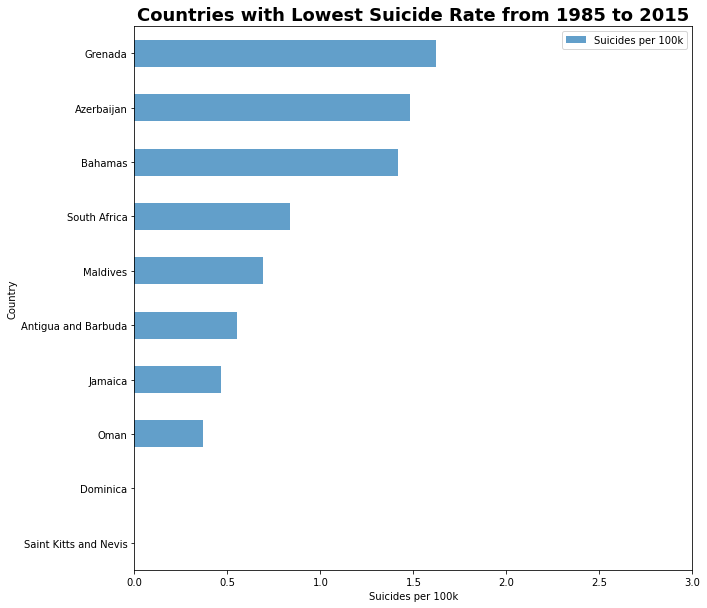

In [15]:
bottomcountry_df = country_df.tail(10) #dataframe with 10 countries with lowest suiide rate 

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Countries with Lowest Suicide Rate from 1985 to 2015", size = 18, fontweight = "bold") #plotting bar graph
bottomcountry_df = bottomcountry_df.sort_values(by = ["Suicides per 100k"], ascending = True)
bottomcountry_df.plot(ax = ax, kind = "barh", alpha = 0.7)
ax.set_xlabel("Suicides per 100k")
ax.set_ylabel("Country")
ax.set_xlim(0,3)

30 years is a long range, and averages may become misleading when considering the entire dataset. I'm curious to see how the countries on the extreme change when only looking at the 10 more recent years of data. 

In [16]:
dfrecent = df[(df["Year"] >= 2005) & (df["Year"] <= 2015)] #creating new dataframe with data only from 2005 to 2015. 
dfrecent

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k pop,Country-year,Hdi for year,gdp_for_year ($),Gdp_per_capita ($),Generation
192,Albania,2005,female,15-24 years,0,281922,0.00,Albania2005,0.695,"8,158,548,717",2931,Millenials
193,Albania,2005,female,25-34 years,0,190745,0.00,Albania2005,0.695,"8,158,548,717",2931,Generation X
194,Albania,2005,female,35-54 years,0,386513,0.00,Albania2005,0.695,"8,158,548,717",2931,Boomers
195,Albania,2005,female,5-14 years,0,276559,0.00,Albania2005,0.695,"8,158,548,717",2931,Millenials
196,Albania,2005,female,55-74 years,0,210998,0.00,Albania2005,0.695,"8,158,548,717",2931,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [17]:
recentcountry_list = dfrecent["Country"].unique() #adding to list unique countries
recentcountry_list.sort()
recentcountry_df = pd.DataFrame(recentcountry_list)
recentcountry_df.columns = ["Country"]
recentcountry_df = recentcountry_df.set_index(["Country"])

recentcountrysuicide_list = []
for country in recentcountry_list:
    temp_value = dfrecent[dfrecent["Country"] == country]["Suicides_no"].values.sum()
    temp_value2 = dfrecent[dfrecent["Country"] == country]["Population"].values.sum()
    recentcountrysuicide_list.append(temp_value*100000/temp_value2)
recentcountry_df["Suicides per 100k"] = recentcountrysuicide_list
recentcountry_df = recentcountry_df.sort_values(by = ["Suicides per 100k"], ascending = False)

recentcountry_df

,Suicides per 100k
Country,
Lithuania,35.468707
Republic of Korea,28.787487
Guyana,27.945491
Suriname,26.132968
Belarus,25.777271
...,...
Barbados,0.810044
Azerbaijan,0.694348
Maldives,0.569270


(0.0, 45.0)

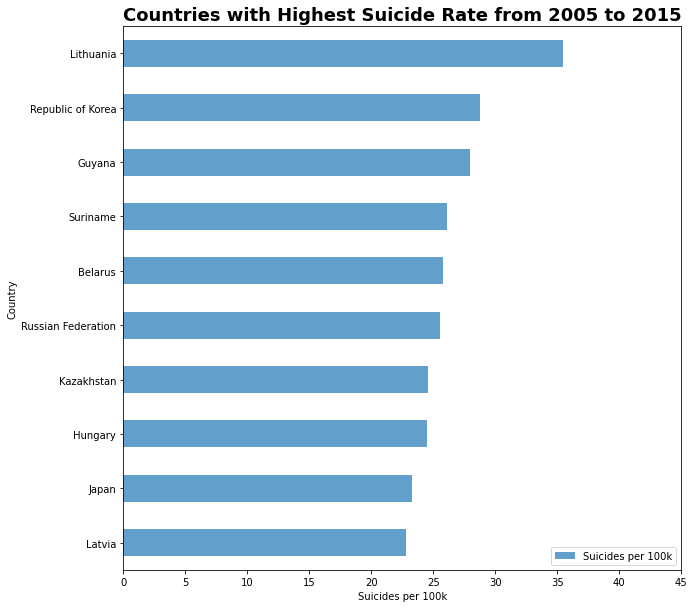

In [18]:
recenttopcountry_df = recentcountry_df.head(10)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Countries with Highest Suicide Rate from 2005 to 2015", size = 18, fontweight = "bold")
recenttopcountry_df = recenttopcountry_df.sort_values(by = ["Suicides per 100k"], ascending = True)
recenttopcountry_df.plot(ax = ax, kind = "barh", alpha = 0.7)
ax.set_xlabel("Suicides per 100k")
ax.set_ylabel("Country")
ax.set_xlim(0,45)

(0.0, 3.0)

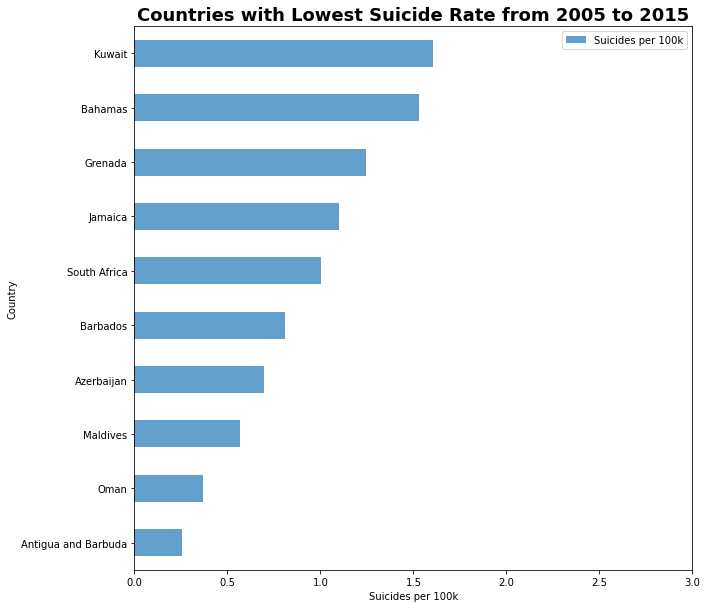

In [19]:
recentbottomcountry_df = recentcountry_df.tail(10)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Countries with Lowest Suicide Rate from 2005 to 2015", size = 18, fontweight = "bold")
recentbottomcountry_df = recentbottomcountry_df.sort_values(by = ["Suicides per 100k"], ascending = True)
recentbottomcountry_df.plot(ax = ax, kind = "barh", alpha = 0.7)
ax.set_xlabel("Suicides per 100k")
ax.set_ylabel("Country")
ax.set_xlim(0,3)

Lithuania remained at the top of the list, though decreasing to 35 suicides per 100k from 41 per 100k. We see that other countries that were at the top of the list also enjoying lower suicide rates, such as Russia going from 32 suicides per 100k to 25 per 100k. Korea, which wasn't in the original top 10 graph, shot up behind Lithuania at 29 suicides per 100k between 2005 and 2015. 

No obvious conclusions can be made from these graphs - it appears like the most developed nations are generally neither at the top nor bottom of the spectrum.

Next, we examine the suicide statistics for four countries: United States, South Korea, Russia, and Japan. 

# United States

In [20]:
us_df = df[df["Country"] == "United States"] # creating dataframe for us data 

usyear_list = us_df["Year"].unique()
usyear_list.sort()
ustotal_df = pd.DataFrame(usyear_list)
ustotal_df.columns = ["Year"]
ustotal_df = ustotal_df.set_index(["Year"]) #indexed by year

ussuicide_list = []
for year in usyear_list:
    temp_value = us_df[us_df["Year"] == year]["Suicides_no"].values.sum()
    ussuicide_list.append(temp_value)
ustotal_df["Total # Suicides"] = ussuicide_list #adding suicide data

uspopulation_list = []
for year in usyear_list:
    temp_value = us_df[us_df["Year"] == year]["Population"].values.sum()
    uspopulation_list.append(temp_value)
ustotal_df["Total Population"] = uspopulation_list #adding population data
ustotal_df["Suicide Ratio per 100k"] = (ustotal_df["Total # Suicides"]*100000)/ustotal_df["Total Population"] #adding suicide ratio data
ustotal_df

ustotal_df

,Total # Suicides,Total Population,Suicide Ratio per 100k
Year,,,
1985,29446,220723000,13.340703
1986,30892,222953000,13.855835
1987,30783,225148000,13.672340
1988,30388,227353000,13.365999
1989,30218,229487000,13.167630
1990,30895,229952200,13.435401
1991,30790,232955000,13.217145
1992,30471,235565600,12.935250
1993,31084,238092300,13.055441


Text(0, 0.5, 'Suicides per 100k')

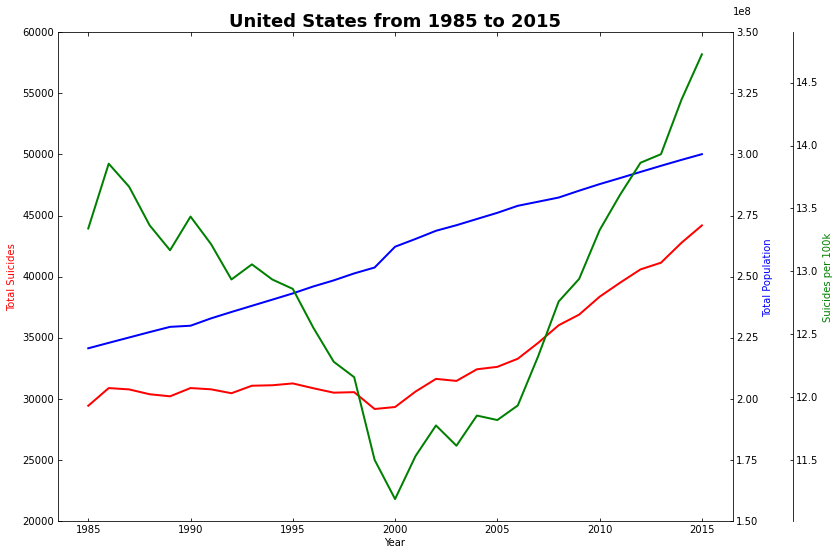

In [21]:
plt.figure(figsize=[15,9])
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right = 0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc = "right", offset = (60,0))

par1.axis["right"].toggle(all = True)
par2.axis["left"].toggle(all = True)

p1, = host.plot(ustotal_df.index, ustotal_df["Total # Suicides"], color = "red", label = "Total Suicides", linewidth = 2)
p2, = par1.plot(ustotal_df.index, ustotal_df["Total Population"], color = "blue", label = "Total Population", linewidth = 2)
p3, = par2.plot(ustotal_df.index, ustotal_df["Suicide Ratio per 100k"], color = "green", label = "Suicide Ratio", linewidth = 2)

host.set_title("United States from 1985 to 2015", size = 18, fontweight = "bold")
host.set_xlabel("Year")
host.set_ylabel("Total Suicides", color = "red")
host.set_ylim(20000, 60000)

par1.set_ylabel("Total Population", color = "blue")
par1.set_ylim(150000000, 350000000)

par2.set_ylabel("Suicides per 100k", color = "green")

Total suicides in the US increase by over 10,000 per year over the span of the range. We see that even though the population grew to 300,000 in 2015, the suicide rate has risen over recent years and reaches a high of approximately 14 per 100k in 2015. Unlike the global trend where suicide rates peaked around 1995, the US suicide rate actually troughed in 2000. 

In [22]:
usheatdata = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
usheat_df = pd.DataFrame(usheatdata) #creating dataframe for US heat map
usheat_df

,Gender,Age
0,male,5-14 years
1,male,15-24 years
2,male,25-34 years
3,male,35-54 years
4,male,55-74 years
5,male,75+ years
6,female,5-14 years
7,female,15-24 years
8,female,25-34 years
9,female,35-54 years


In [23]:
usheat_list = []
for index, row in usheat_df.iterrows():
    ussuicide_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "United States")]["Suicides_no"].values.sum()
    uspopulation_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "United States")]["Population"].values.sum()
    us_value = ussuicide_value*100000/uspopulation_value
    usheat_list.append(us_value)
usheat_df["Suicide Rate"] = usheat_list #adding suicide rate data 
usheat_df

,Gender,Age,Suicide Rate
0,male,5-14 years,1.049541
1,male,15-24 years,18.759516
2,male,25-34 years,23.083141
3,male,35-54 years,24.624456
4,male,55-74 years,25.738658
5,male,75+ years,43.099450
6,female,5-14 years,0.415830
7,female,15-24 years,3.784173
8,female,25-34 years,5.319043
9,female,35-54 years,7.653027


In [24]:
usheatdata2 = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
usheat_df2 = pd.DataFrame(usheatdata) #creating dataframe for recent suicide rate data
usheat_df2

,Gender,Age
0,male,5-14 years
1,male,15-24 years
2,male,25-34 years
3,male,35-54 years
4,male,55-74 years
5,male,75+ years
6,female,5-14 years
7,female,15-24 years
8,female,25-34 years
9,female,35-54 years


In [25]:
usheat_list2 = []
for index, row in usheat_df2.iterrows():
    ussuicide_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "United States")]["Suicides_no"].values.sum()
    uspopulation_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "United States")]["Population"].values.sum()
    us_value = ussuicide_value*100000/uspopulation_value
    usheat_list2.append(us_value)
usheat_df2["Suicide Rate"] = usheat_list2
usheat_df2

,Gender,Age,Suicide Rate
0,male,5-14 years,0.956589
1,male,15-24 years,16.943771
2,male,25-34 years,22.363404
3,male,35-54 years,26.619459
4,male,55-74 years,26.079560
5,male,75+ years,37.070393
6,female,5-14 years,0.476960
7,female,15-24 years,3.973328
8,female,25-34 years,5.594178
9,female,35-54 years,8.624128


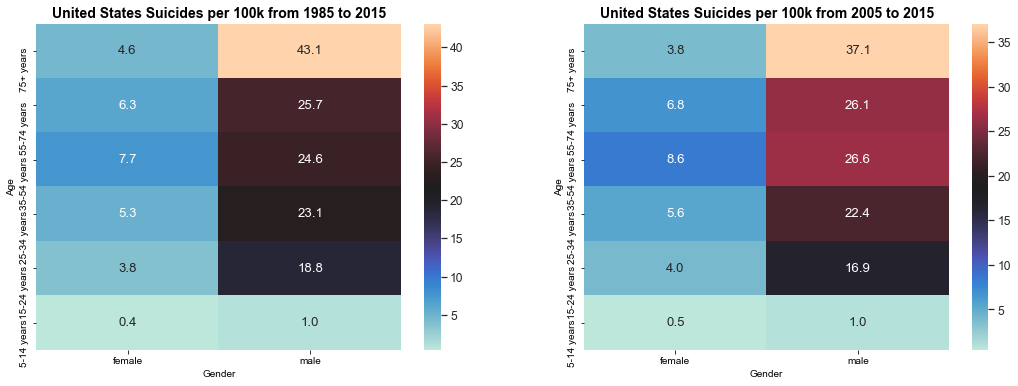

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.set(font_scale = 1.1)
ustable = usheat_df.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
ustable2 = usheat_df2.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
ustable = ustable.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
ustable2 = ustable2.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
sns.heatmap(data = ustable, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[0])
sns.heatmap(data = ustable2, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[1])
ax[0].set_title("United States Suicides per 100k from 1985 to 2015", size = 14, fontweight = "bold")
ax[1].set_title("United States Suicides per 100k from 2005 to 2015", size = 14, fontweight = "bold")
plt.show()

We observe that the males in the US are committing suicide at significantly higher rates than females, akin to the global gender trend. While the suicide rate has decreased for those who are 75+, the rate has increased among people aged 35-54 and 55-74 for both genders. The group with the highest suicide rate remains males who are 75+.

# South Korea

In [26]:
korea_df = df[df["Country"] == "Republic of Korea"]

koreayear_list = korea_df["Year"].unique()
koreayear_list.sort()
koreatotal_df = pd.DataFrame(koreayear_list)
koreatotal_df.columns = ["Year"]
koreatotal_df = koreatotal_df.set_index(["Year"])

koreasuicide_list = []
for year in koreayear_list:
    temp_value = korea_df[korea_df["Year"] == year]["Suicides_no"].values.sum()
    koreasuicide_list.append(temp_value)
koreatotal_df["Total # Suicides"] = koreasuicide_list

koreapopulation_list = []
for year in koreayear_list:
    temp_value = korea_df[korea_df["Year"] == year]["Population"].values.sum()
    koreapopulation_list.append(temp_value)
koreatotal_df["Total Population"] = koreapopulation_list
koreatotal_df["Suicide Ratio per 100k"] = (koreatotal_df["Total # Suicides"]*100000)/koreatotal_df["Total Population"]
koreatotal_df

koreatotal_df

,Total # Suicides,Total Population,Suicide Ratio per 100k
Year,,,
1985,3689,36716700,10.047199
1986,3458,37540400,9.211410
1987,3301,38114900,8.660655
1988,2949,38700500,7.620057
1989,3023,39171500,7.717346
1990,3159,39589500,7.979388
1991,3069,39993700,7.673709
1992,3533,40371200,8.751288
1993,4124,40754800,10.119053


Text(0, 0.5, 'Suicides per 100k')

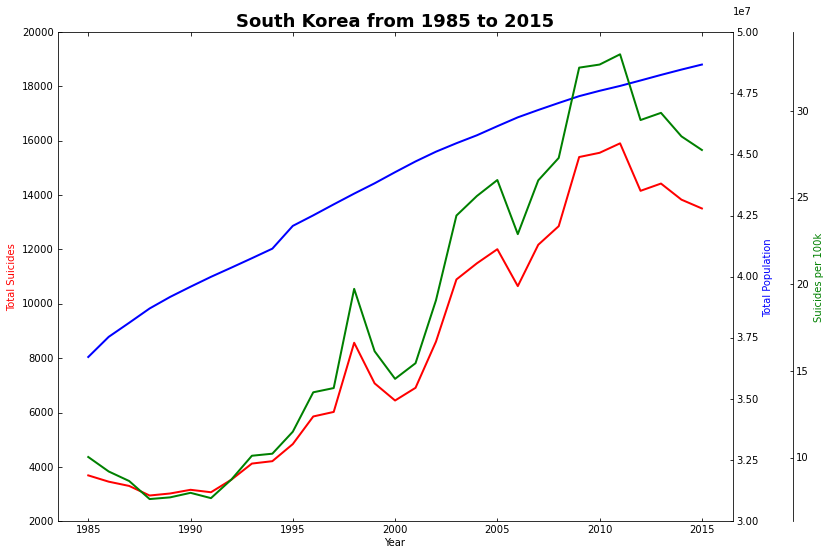

In [28]:
plt.figure(figsize = [15,9])
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right = 0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc = "right", offset = (60,0))

par1.axis["right"].toggle(all = True)
par2.axis["left"].toggle(all = True)

p1, = host.plot(koreatotal_df.index, koreatotal_df["Total # Suicides"], color = "red", label = "Total Suicides", linewidth = 2)
p2, = par1.plot(koreatotal_df.index, koreatotal_df["Total Population"], color = "blue", label = "Total Population", linewidth = 2)
p3, = par2.plot(koreatotal_df.index, koreatotal_df["Suicide Ratio per 100k"], color = "green", label = "Suicide Ratio", linewidth = 2)

host.set_title("South Korea from 1985 to 2015", size = 18, fontweight = "bold")
host.set_xlabel("Year")
host.set_ylabel("Total Suicides", color = "red")
host.set_ylim(2000, 20000)

par1.set_ylabel("Total Population", color = "blue")
par1.set_ylim(30000000, 50000000)

par2.set_ylabel("Suicides per 100k", color = "green")


Suicide in Korea has steadily trended upwards at a concerning rate, increasing from 10 suicides per 100k in 1985 to a high of 33 per 100k in 2011. Total suicides and the suicide rate follow each other closely, suggesting that suicides are becoming more prominent despite a growing population. 

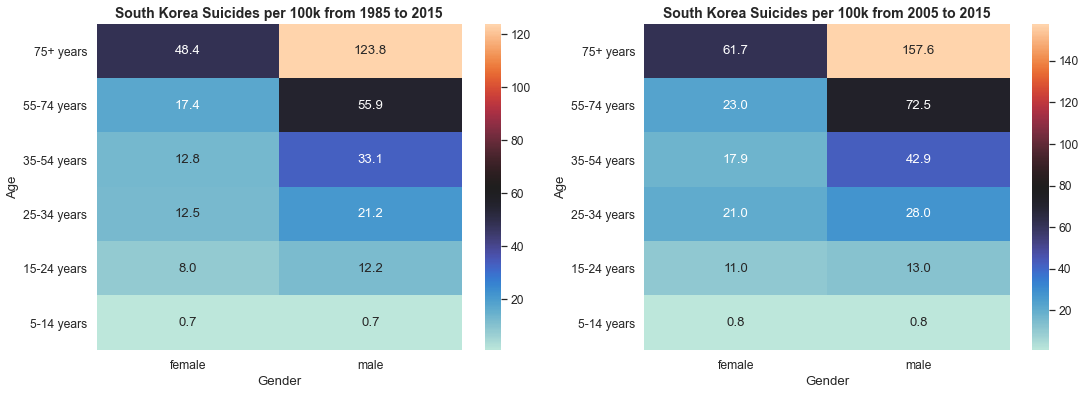

In [34]:
koreaheatdata = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
koreaheat_df = pd.DataFrame(koreaheatdata)

koreaheat_list = []
for index, row in koreaheat_df.iterrows():
    koreasuicide_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "Republic of Korea")]["Suicides_no"].values.sum()
    koreapopulation_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "Republic of Korea")]["Population"].values.sum()
    korea_value = koreasuicide_value*100000/koreapopulation_value
    koreaheat_list.append(korea_value)
koreaheat_df["Suicide Rate"] = koreaheat_list
koreaheat_df

koreaheatdata2 = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
koreaheat_df2 = pd.DataFrame(koreaheatdata)
koreaheat_df2

koreaheat_list2 = []
for index, row in koreaheat_df2.iterrows():
    koreasuicide_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "Republic of Korea")]["Suicides_no"].values.sum()
    koreapopulation_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "Republic of Korea")]["Population"].values.sum()
    korea_value = koreasuicide_value*100000/koreapopulation_value
    koreaheat_list2.append(korea_value)
koreaheat_df2["Suicide Rate"] = koreaheat_list2
koreaheat_df2

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.set(font_scale = 1.1)
koreatable = koreaheat_df.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
koreatable2 = koreaheat_df2.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
koreatable = koreatable.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
koreatable2 = koreatable2.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
sns.heatmap(data = koreatable, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[0])
sns.heatmap(data = koreatable2, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[1])
ax[0].set_title("South Korea Suicides per 100k from 1985 to 2015", size = 14, fontweight = "bold")
ax[1].set_title("South Korea Suicides per 100k from 2005 to 2015", size = 14, fontweight = "bold")
plt.show()

The suicide rate in Korea has increased for all age groups, most prominently in those who are 25+. The group with the highest suicide rate remains males who are 75+, and the rate had grown to an alarming 157.6 during the most recent years. 

# Russia

In [29]:
russia_df = df[df["Country"] == "Russian Federation"]

russiayear_list = russia_df["Year"].unique()
russiayear_list.sort()
russiatotal_df = pd.DataFrame(russiayear_list)
russiatotal_df.columns = ["Year"]
russiatotal_df = russiatotal_df.set_index(["Year"])

russiasuicide_list = []
for year in russiayear_list:
    temp_value = russia_df[russia_df["Year"] == year]["Suicides_no"].values.sum()
    russiasuicide_list.append(temp_value)
russiatotal_df["Total # Suicides"] = russiasuicide_list

russiapopulation_list = []
for year in russiayear_list:
    temp_value = russia_df[russia_df["Year"] == year]["Population"].values.sum()
    russiapopulation_list.append(temp_value)
russiatotal_df["Total Population"] = russiapopulation_list
russiatotal_df["Suicide Ratio per 100k"] = (russiatotal_df["Total # Suicides"]*100000)/russiatotal_df["Total Population"]
russiatotal_df

russiatotal_df

,Total # Suicides,Total Population,Suicide Ratio per 100k
Year,,,
1989,37921,135443800,27.997590
1990,39028,136398200,28.613281
1991,39281,137283000,28.613157
1992,45923,138118900,33.248889
1993,55846,137692800,40.558402
1994,61420,138476200,44.354192
1995,60548,139087100,43.532434
1996,57511,139272600,41.293837
1997,54746,139283200,39.305530


Text(0, 0.5, 'Suicides per 100k')

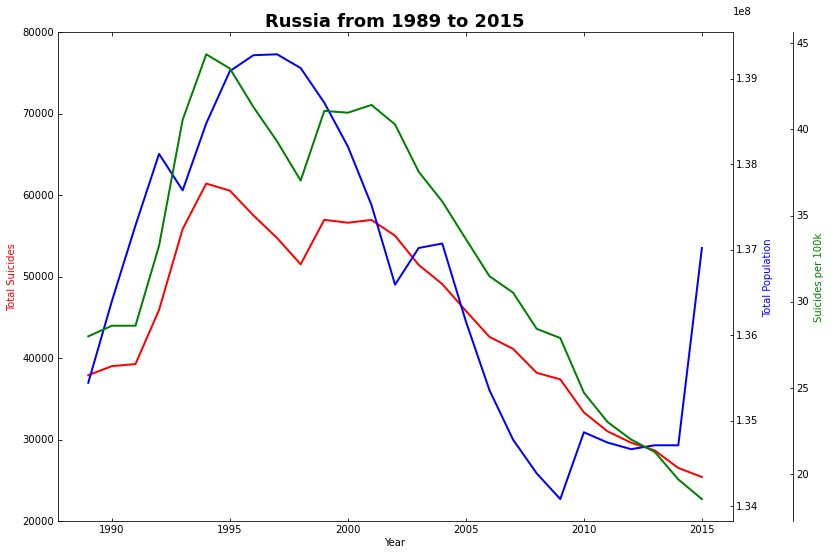

In [30]:
plt.figure(figsize = [15,9])
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right = 0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc = "right", offset = (60,0))

par1.axis["right"].toggle(all = True)
par2.axis["left"].toggle(all = True)

p1, = host.plot(russiatotal_df.index, russiatotal_df["Total # Suicides"], color = "red", label = "Total Suicides", linewidth = 2)
p2, = par1.plot(russiatotal_df.index, russiatotal_df["Total Population"], color = "blue", label = "Total Population", linewidth = 2)
p3, = par2.plot(russiatotal_df.index, russiatotal_df["Suicide Ratio per 100k"], color = "green", label = "Suicide Ratio", linewidth = 2)

host.set_title("Russia from 1989 to 2015", size = 18, fontweight = "bold")
host.set_xlabel("Year")
host.set_ylabel("Total Suicides", color = "red")
host.set_ylim(20000,80000)

par1.set_ylabel("Total Population", color = "blue")
par1.set_ylim()

par2.set_ylabel("Suicides per 100k", color = "green")

Total suicides and the suicide rate has steadily decreased since its peak in 1994. The trends seen here seem in line with the global trend of decreasing suicide rate. Because Russia has a large population and comparably high suicide rate, the country's data certainly makes a large impact on global trends. Unusually, Russia's population decreases between 1997 and 2009 - this may naturally lower the number of suicides, but the suicide rate has decreased considerably down to below 19 and 2015.

Note that unnlike previous figures, Russia's data begins four years later in 1989. 

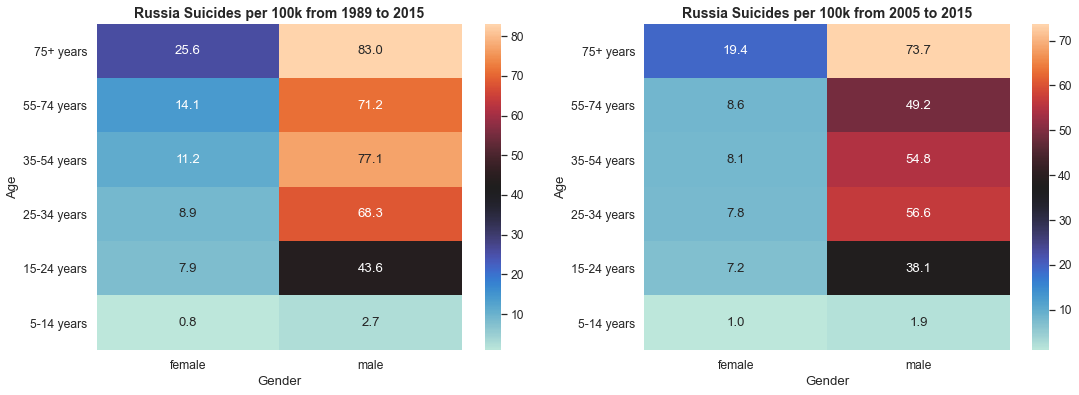

In [35]:
russiaheatdata = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
russiaheat_df = pd.DataFrame(russiaheatdata)

russiaheat_list = []
for index, row in russiaheat_df.iterrows():
    russiasuicide_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "Russian Federation")]["Suicides_no"].values.sum()
    russiapopulation_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "Russian Federation")]["Population"].values.sum()
    russia_value = russiasuicide_value*100000/russiapopulation_value
    russiaheat_list.append(russia_value)
russiaheat_df["Suicide Rate"] = russiaheat_list
russiaheat_df

russiaheatdata2 = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
russiaheat_df2 = pd.DataFrame(russiaheatdata)
russiaheat_df2

russiaheat_list2 = []
for index, row in russiaheat_df2.iterrows():
    russiasuicide_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "Russian Federation")]["Suicides_no"].values.sum()
    russiapopulation_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "Russian Federation")]["Population"].values.sum()
    russia_value = russiasuicide_value*100000/russiapopulation_value
    russiaheat_list2.append(russia_value)
russiaheat_df2["Suicide Rate"] = russiaheat_list2
russiaheat_df2

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.set(font_scale = 1.1)
russiatable = russiaheat_df.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
russiatable2 = russiaheat_df2.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
russiatable = russiatable.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
russiatable2 = russiatable2.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
sns.heatmap(data = russiatable, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[0])
sns.heatmap(data = russiatable2, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[1])
ax[0].set_title("Russia Suicides per 100k from 1989 to 2015", size = 14, fontweight = "bold")
ax[1].set_title("Russia Suicides per 100k from 2005 to 2015", size = 14, fontweight = "bold")
plt.show()

All of the age groups in Russia are oberserved to have lower suicide rates in recent years. Suicide amongst males are consistently higher than females.

# Japan

In [31]:
japan_df = df[df["Country"] == "Japan"]

japanyear_list = japan_df["Year"].unique()
japanyear_list.sort()
japantotal_df = pd.DataFrame(japanyear_list)
japantotal_df.columns = ["Year"]
japantotal_df = japantotal_df.set_index(["Year"])

japansuicide_list = []
for year in japanyear_list:
    temp_value = japan_df[japan_df["Year"] == year]["Suicides_no"].values.sum()
    japansuicide_list.append(temp_value)
japantotal_df["Total # Suicides"] = japansuicide_list

japanpopulation_list = []
for year in japanyear_list:
    temp_value = japan_df[japan_df["Year"] == year]["Population"].values.sum()
    japanpopulation_list.append(temp_value)
japantotal_df["Total Population"] = japanpopulation_list
japantotal_df["Suicide Ratio per 100k"] = (japantotal_df["Total # Suicides"]*100000)/japantotal_df["Total Population"]
japantotal_df

japantotal_df

,Total # Suicides,Total Population,Suicide Ratio per 100k
Year,,,
1985,23257,112809200,20.616226
1986,25484,113679000,22.417509
1987,23663,114416000,20.681548
1988,22676,115101000,19.700958
1989,21013,115766000,18.151271
1990,20002,116251400,17.205814
1991,19780,116802000,16.934642
1992,20756,117311000,17.693140
1993,20353,117735000,17.287128


Text(0, 0.5, 'Suicides per 100k')

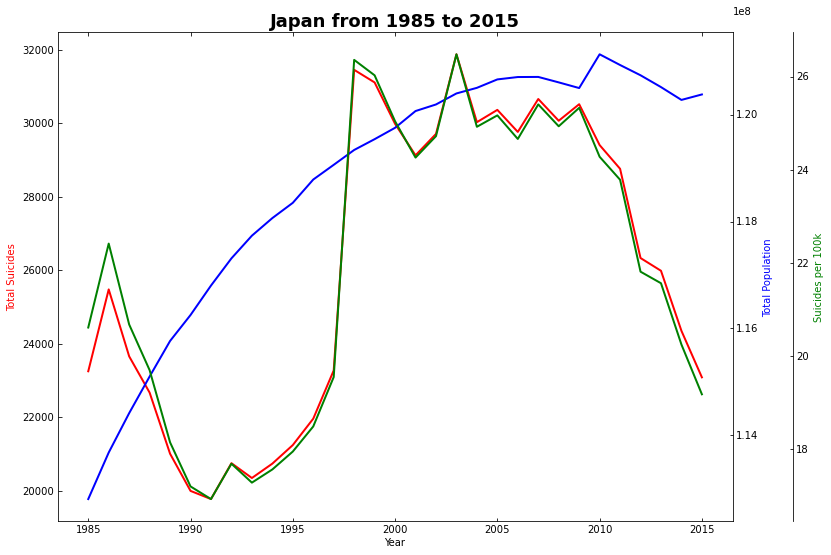

In [32]:
plt.figure(figsize = [15,9])
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right = 0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc = "right", offset = (60,0))

par1.axis["right"].toggle(all = True)
par2.axis["left"].toggle(all = True)

p1, = host.plot(japantotal_df.index, japantotal_df["Total # Suicides"], color = "red", label = "Total Suicides", linewidth = 2)
p2, = par1.plot(japantotal_df.index, japantotal_df["Total Population"], color = "blue", label = "Total Population", linewidth = 2)
p3, = par2.plot(japantotal_df.index, japantotal_df["Suicide Ratio per 100k"], color = "green", label = "Suicide Ratio", linewidth = 2)

host.set_title("Japan from 1985 to 2015", size = 18, fontweight = "bold")
host.set_xlabel("Year")
host.set_ylabel("Total Suicides", color = "red")
host.set_ylim()

par1.set_ylabel("Total Population", color = "blue")
par1.set_ylim()

par2.set_ylabel("Suicides per 100k", color = "green")

Suicide in Japan soared in 1998 to 26 suicides per 100k - the rate plateued for 10 years before decreasing in more recent years. 

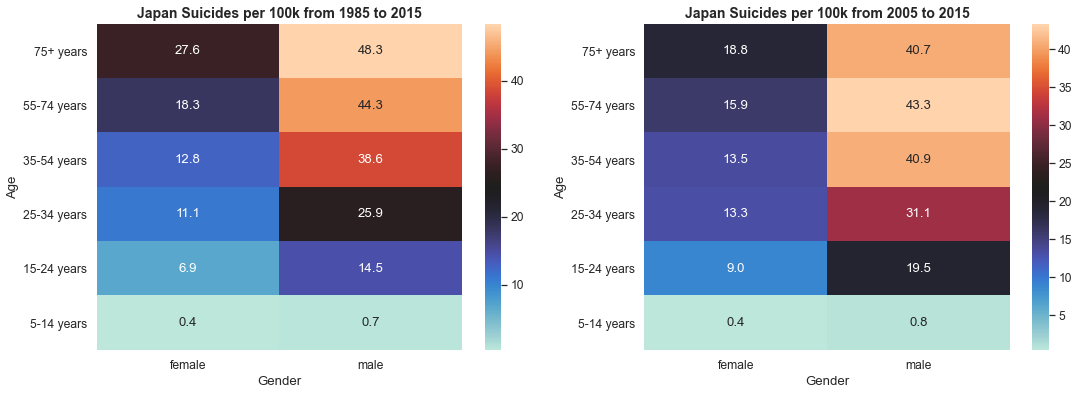

In [36]:
japanheatdata = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
japanheat_df = pd.DataFrame(japanheatdata)

japanheat_list = []
for index, row in japanheat_df.iterrows():
    japansuicide_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "Japan")]["Suicides_no"].values.sum()
    japanpopulation_value = df[(df["Sex"] == row["Gender"]) & (df["Age"] == row["Age"]) & (df["Country"] == "Japan")]["Population"].values.sum()
    japan_value = japansuicide_value*100000/japanpopulation_value
    japanheat_list.append(japan_value)
japanheat_df["Suicide Rate"] = japanheat_list
japanheat_df

japanheatdata2 = {"Gender": ["male", "male", "male", "male", "male", "male", "female", "female", "female", "female", "female", "female"],
             "Age": ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years", "5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]}
japanheat_df2 = pd.DataFrame(japanheatdata)
japanheat_df2

japanheat_list2 = []
for index, row in japanheat_df2.iterrows():
    japansuicide_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "Japan")]["Suicides_no"].values.sum()
    japanpopulation_value = dfrecent[(dfrecent["Sex"] == row["Gender"]) & (dfrecent["Age"] == row["Age"]) & (dfrecent["Country"] == "Japan")]["Population"].values.sum()
    japan_value = japansuicide_value*100000/japanpopulation_value
    japanheat_list2.append(japan_value)
japanheat_df2["Suicide Rate"] = japanheat_list2
japanheat_df2

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.set(font_scale = 1.1)
japantable = japanheat_df.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
japantable2 = japanheat_df2.pivot(index = "Age", columns = "Gender", values = "Suicide Rate")
japantable = japantable.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
japantable2 = japantable2.reindex(["75+ years", "55-74 years", "35-54 years", "25-34 years", "15-24 years", "5-14 years"])
sns.heatmap(data = japantable, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[0])
sns.heatmap(data = japantable2, annot = True, fmt = "1.1f", cmap = "icefire", ax = ax[1])
ax[0].set_title("Japan Suicides per 100k from 1985 to 2015", size = 14, fontweight = "bold")
ax[1].set_title("Japan Suicides per 100k from 2005 to 2015", size = 14, fontweight = "bold")
plt.show()

Though the suicide rate in Japan has decreased slightly in recent years, suicide had became more prominent in some groups. Suicide between the ages of 15 and 54 increased between both genders. While males 75+ had the highest rate at 48.3 suicides per 100k, the highest rate in recent years became males aged between 55-74 at 43.3 per 100k. 

# Conclusion

On a global level, several trends can be seen. First, the average suicide rate has been steadily decreasing since 1995. Most clearly, males are much more likely to commit suicide than females. 

Yet, once we break down the data by country, it becomes apparent that the global aggregate data tells a one-dimensional story and that each country has its unique trends and problems with suicide. The four countries picked were arbritrary and certainly only capture a small portion of the world population, but the data provides much insight. While some countries, like Russia, are in-line with the global trend of lower suicide rates, other countries are trending in the opposite direction. Suicide rates in the United States and South Korea continue to increase at alarming rates, and Japan continues to have a high rate as well. 

Across the four countries analyzed, some patterns stay consistent: males are shown to have higher suicide rates among all age groups, and suicide risk is generally heightened as people age. 